<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1131/2889911005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_counts.head(15), x='Count', y='Industry', palette='mako')


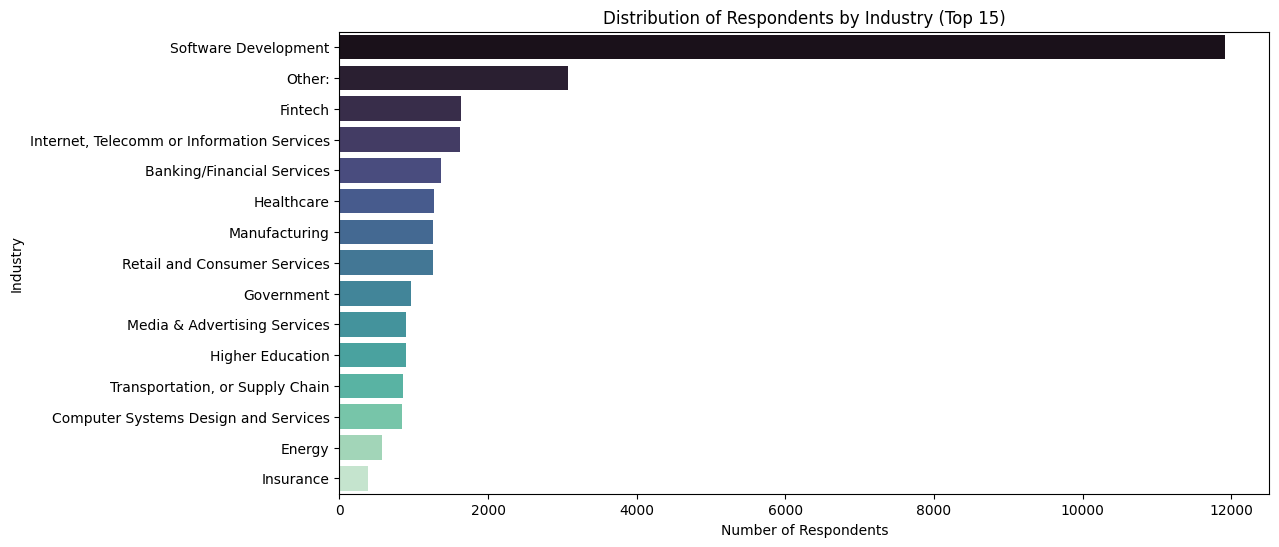

In [3]:
##Write your code here

# Value counts for Industry column
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=industry_counts.head(15), x='Count', y='Industry', palette='mako')

plt.title('Distribution of Respondents by Industry (Top 15)')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
import pandas as pd
import numpy as np

# Ensure compensation is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop NaNs for stats
comp = df['ConvertedCompYearly'].dropna()

# Basic statistics
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print("Mean Compensation:", mean_comp)
print("Median Compensation:", median_comp)
print("Standard Deviation:", std_comp)

# Define outlier threshold (3 standard deviations above mean)
threshold = mean_comp + 3 * std_comp
print("Outlier Threshold:", threshold)

# Identify respondents exceeding the threshold
high_earners = df[df['ConvertedCompYearly'] > threshold]

print("Number of High Earners:", len(high_earners))
print(high_earners[['ConvertedCompYearly']].head(10))


Mean Compensation: 86155.28726264134
Median Compensation: 65000.0
Standard Deviation: 186756.97308629754
Outlier Threshold: 646426.206521534
Number of High Earners: 89
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0
2316            1000000.0
2592             800000.0
3024            1302817.0
5934            1031099.0
6735             650000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 32712.0
Q3 (75th percentile): 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978
     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0
570             250000.0
594             432000.0
636             300000.0
678             295662.0
703             250000.0


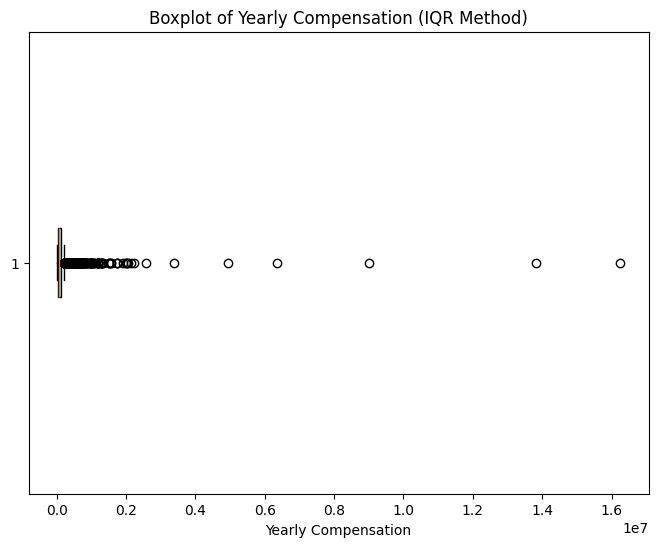

In [5]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Ensure numeric values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop NaNs
comp = df['ConvertedCompYearly'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print("Number of Outliers:", len(outliers))
print(outliers[['ConvertedCompYearly']].head(10))

# Box plot visualization
plt.figure(figsize=(8,6))
plt.boxplot(comp, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Yearly Compensation (IQR Method)")
plt.xlabel("Yearly Compensation")
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Ensure numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop NaNs
comp = df['ConvertedCompYearly'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# New DataFrame without outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

# Validation
print("Original DataFrame size:", df.shape)
print("New DataFrame size (no outliers):", df_no_outliers.shape)
print("Number of rows removed:", df.shape[0] - df_no_outliers.shape[0])


Original DataFrame size: (65437, 114)
New DataFrame size (no outliers): (22457, 114)
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Unique Age_numeric values after mapping: [17. 40. 50. 21. 30. 60. 70.]
Non-null count: 65115

 Correlations with Age_numeric:
Age_numeric            1.000000
YearsCodePro           0.818828
ConvertedCompYearly    0.135408
JobSat                 0.070373
Name: Age_numeric, dtype: float64


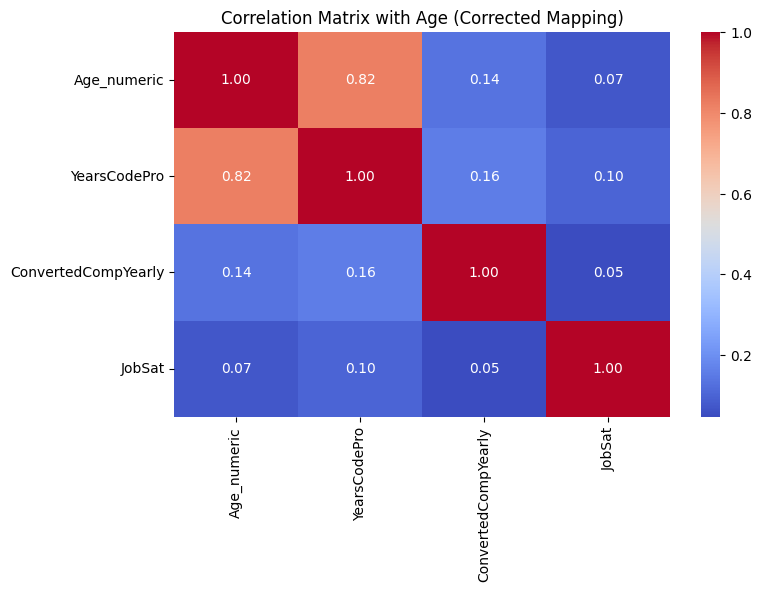

In [14]:
##Write your code here
## Write your code here

# Correct mapping based on actual values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply mapping, ignore "Prefer not to say"
df['Age_numeric'] = df['Age'].map(age_mapping)

print("Unique Age_numeric values after mapping:", df['Age_numeric'].dropna().unique())
print("Non-null count:", df['Age_numeric'].notnull().sum())

# Recompute correlation (drop rows where any is NaN)
numeric_df = df[['Age_numeric', 'YearsCodePro', 'ConvertedCompYearly', 'JobSat']].dropna()
corr_matrix = numeric_df.corr()

print("\n Correlations with Age_numeric:")
print(corr_matrix['Age_numeric'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix with Age (Corrected Mapping)")
plt.show()







<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
